# STA 141B Assignment 4

Due __March 03, 2023__ by __11:59pm__. Submit by editing this file and then uploading to Canvas.

Please rename this file with __"LastName_FirstName_hw4"__ 

The purpose of this assignment is to practice reading data using API and web scraping.

Notes: 
1. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

2. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the __one-statement-per-line__ rule. The lenghth of your code should not exceed the maximum length of each cell for display. If your code is too long, you should split it into multiple lines to improve readability. (You will lose one point for each line that does not follow the rule.)

3. To help understand and maintain code, you should always add comments to explain your code. Use the hash symbol (#) to start writing a comment (homework without any comments will automatically receive 0 points). If you are writing a function, consider using _docstring_ to add explanation. 

4. Submit your final work with a __.pdf__ (or a __.html__) file to Canvas. To convert a .ipynb file to a .pdf/.html file, go to "File", click "Download as", and then click "PDF via LaTeX"/"HTML". 

5. Please do not clear your output so that we can see your answers without running all of the cells.

### Natural Language Processing exercises

#### Part I

Import the `nltk.corpus` submodule, download the Project Gutenberg. Find a document other than `carroll-alice.txt`. Read in that document. Do the following: 
* Splits the document into sentences, take out the first 20 sentences, print out the first 20 sentences
* Splits the first 20 sentences into words
* Standardizing Text:
    * Lowercasing the first 20 sentences
    * Remove prefixes and suffixes from words through lemmatization
    * Remove tokens that don't contribute meaning
    * Plot the frequency distribution for tokens

In [54]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import gutenberg,stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import matplotlib.pyplot as plt
import string


# read in moby dick corpus
moby_raw = gutenberg.raw("melville-moby_dick.txt")
# remove carriage returns and new lines Find the beginning of the text
moby_raw = moby_raw[moby_raw.find("Call me Ishmael"):].replace('\r', ' ').replace('\n', '')

# tokenize the raw text into sentences
moby_sentences = nltk.sent_tokenize(moby_raw)

# extract the first 20 sentences
moby_sentences = moby_sentences[0:20]

print(moby_sentences)

[nltk_data] Downloading package gutenberg to /home/cam/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/cam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/cam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Call me Ishmael.', 'Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.', 'It is a way I have of driving off the spleen and regulating the circulation.', "Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can.", 'This is my substitute for pistol and ball.', 'With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship.', 'There is nothing surprising in this.', 'If t

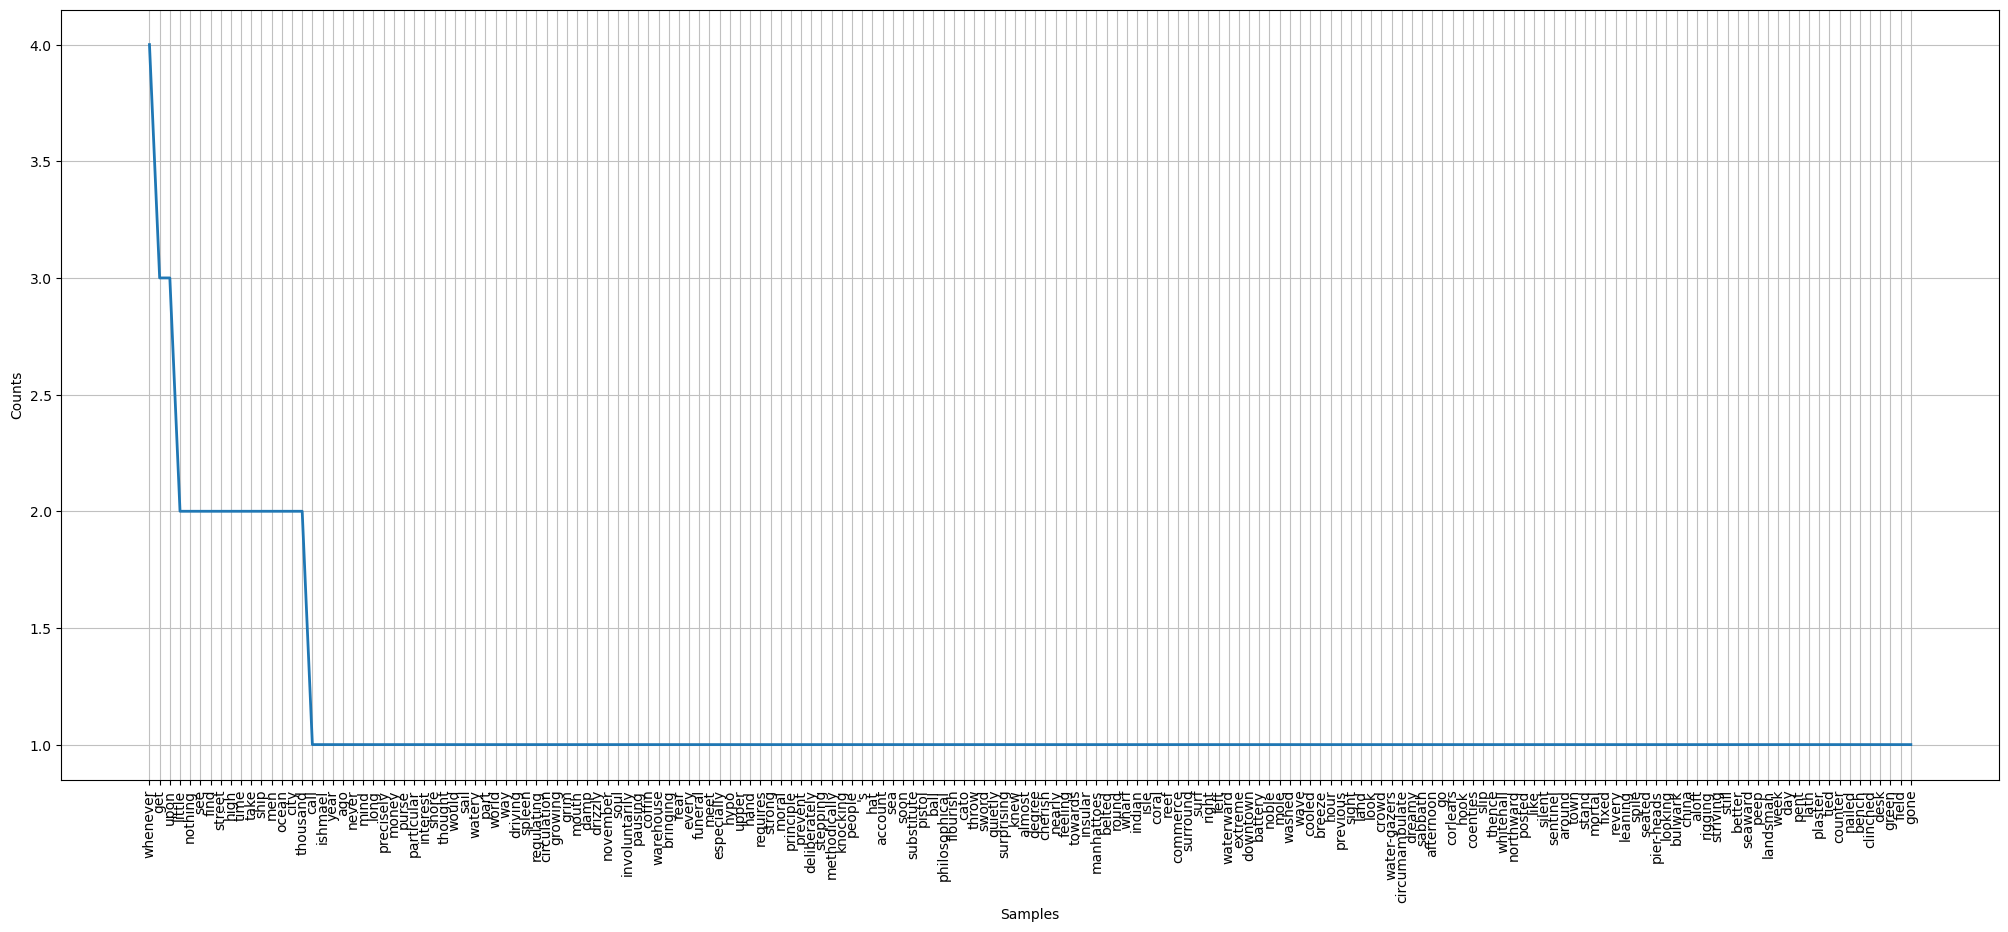

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
# combine the sentences into one string and lowercase the string
moby_20_text = " ".join(moby_sentences).lower()
# define stop words
stop_words = set(stopwords.words("english"))
# define punctuation
punctuation = set(string.punctuation)
# add a special character to the puncuation set
punctuation.add("--") 
# initialize the word net lemmatizer
lemmatizer = WordNetLemmatizer()
# for each word that is tokenized lemmatize it. remove if it's punctuation or a stop word
moby_tokens = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(moby_20_text) if word not in stop_words and word not in punctuation] 

plt.figure(figsize=(25,10))
# plot the frequency distribution
FreqDist(moby_tokens).plot()

#### Part II

Take out three sentences from the document you choose in Part I (note: you can choose any sentences, but they need to be complete sentences). Do the following: 
1. compute the word frequencies for this small corpus using the scikit-learn package; convert the output to a data frame and add column names as their features names
2. do the same as in 1. using one-hot encoding
3. calculate the tf-idf (use `sublinear_tf = True`)
4. measure the cosine similarity between the three sentences 
5. calculate the tf-idf using the bi-gram model and then measure the cosine similarity between the three sentences 

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# select the first 3 sentences
sentences = moby_sentences[1:4]
sentences

['Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.',
 'It is a way I have of driving off the spleen and regulating the circulation.',
 "Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can."]

In [57]:
# initialize a count vectorizer
vectorizer = CountVectorizer()
# fit using the 3 sentences
vectorizer.fit_transform(sentences)

# extract each unique word
unique_words = vectorizer.get_feature_names_out()
# get the word frequencies as an array
word_frequencies = vectorizer.transform(sentences).toarray()

# create a pandas data frame
freq_df = pd.DataFrame(word_frequencies, columns=unique_words)

freq_df

,about,account,ago,an,and,as,before,bringing,can,circulation,...,to,up,upper,warehouses,watery,way,whenever,world,would,years
0,1,0,1,0,2,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,3,2,1,1,1,0,...,3,1,1,1,0,0,4,0,0,0


In [58]:
# similar process with one hot encoding
vectorizer = CountVectorizer(binary=True)
vectorizer.fit_transform(sentences)

unique_words = vectorizer.get_feature_names_out()
word_frequencies = vectorizer.transform(sentences).toarray()

freq_df = pd.DataFrame(word_frequencies, columns=unique_words)

freq_df

,about,account,ago,an,and,as,before,bringing,can,circulation,...,to,up,upper,warehouses,watery,way,whenever,world,would,years
0,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0


In [59]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True)
vectorizer.fit_transform(sentences)

# Get the unique words and their tf-idf scores
unique_words = vectorizer.get_feature_names_out()
tfidf_scores = vectorizer.transform(sentences).toarray()

# Create a pandas dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores, columns=unique_words)
tfidf_df

,about,account,ago,an,and,as,before,bringing,can,circulation,...,to,up,upper,warehouses,watery,way,whenever,world,would,years
0,0.132175,0.000000,0.173795,0.000000,0.173795,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.132175,0.000000,0.000000,0.000000,0.173795,0.000000,0.000000,0.173795,0.173795,0.173795
1,0.000000,0.000000,0.000000,0.000000,0.192302,0.000000,0.000000,0.000000,0.000000,0.325596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.325596,0.000000,0.000000,0.000000,0.000000
2,0.086135,0.113258,0.000000,0.113258,0.140380,0.191762,0.113258,0.113258,0.113258,0.000000,...,0.180765,0.113258,0.113258,0.113258,0.000000,0.000000,0.270266,0.000000,0.000000,0.000000


In [60]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# Calculate the cosine similarity between the sentences
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.13159622, 0.16793955],
       [0.13159622, 1.        , 0.2114691 ],
       [0.16793955, 0.2114691 , 1.        ]])

In [61]:
# this time use the bi-gram model
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
tfidf_matrix = vectorizer.fit_transform(sentences)


# Calculate the cosine similarity between the sentences
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.01069825],
       [0.        , 1.        , 0.01875348],
       [0.01069825, 0.01875348, 1.        ]])